In [1]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

In [2]:
import math
-0.5 * math.log(0.5, 2) -0.5 * math.log(0.5, 2)

1.0

In [3]:
math.log(0.5, 2) 

-1.0

In [4]:
from typing import List
import math

def entropy(class_probabilities: List[float]) -> float:
    """Given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2)
               for p in class_probabilities
               if p > 0)                     # ignore zero probabilities

assert entropy([1.0]) == 0
assert entropy([0.5, 0.5]) == 1
assert 0.81 < entropy([0.25, 0.75]) < 0.82

In [5]:
from typing import Any
from collections import Counter

def class_probabilities(labels: List[Any]) -> List[float]:
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]

def data_entropy(labels: List[Any]) -> float:
    return entropy(class_probabilities(labels))

assert data_entropy(['a']) == 0
assert data_entropy([True, False]) == 1 == entropy([0.5, 0.5])
assert data_entropy([3, 4, 4, 4]) == entropy([0.25, 0.75])

In [6]:
entropy([0.5, 0.5])

1.0

In [7]:
entropy([0.25, 0.75])

0.8112781244591328

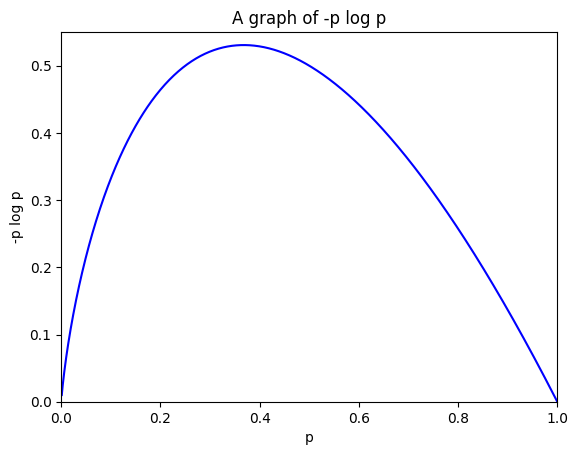

In [8]:
import numpy as np
from matplotlib import pyplot as plt

xs = np.linspace(0.001, 1.000, 1000)
ys = [-p * math.log(p, 2) for p in xs]
plt.plot(xs, ys, c = 'blue')
plt.xlim(0.0, 1.0)
plt.ylim(0, 0.55)
#plt.legend()
plt.title('A graph of -p log p')
plt.xlabel('p')
plt.ylabel('-p log p')
plt.show()

In [45]:
import math
sum([-math.log(0.5, 2)*0.5, -math.log(0.5, 2)*0.5])

1.0

In [46]:
sum([-math.log(0.25, 2)*0.25, -math.log(0.75, 2)*0.75])

0.8112781244591328

In [47]:
-math.log(0.25, 2)*0.25*4

2.0

In [48]:
-math.log(0.2, 2)*0.2*5

2.321928094887362

In [49]:
-math.log(0.1, 2)*0.1*10

3.3219280948873626

In [9]:
def partition_entropy(subsets: List[List[Any]]) -> float:
    """Returns the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)

    return sum(data_entropy(subset) * len(subset) / total_count
               for subset in subsets)

from typing import NamedTuple, Optional

class Candidate(NamedTuple):
    level: str
    lang: str
    tweets: bool
    phd: bool
    did_well: Optional[bool] = None  # allow unlabeled data

                  #  level     lang     tweets  phd  did_well
inputs = [Candidate('Senior', 'Java',   False, False, False),
          Candidate('Senior', 'Java',   False, True,  False),
          Candidate('Mid',    'Python', False, False, True),
          Candidate('Junior', 'Python', False, False, True),
          Candidate('Junior', 'R',      True,  False, True),
          Candidate('Junior', 'R',      True,  True,  False),
          Candidate('Mid',    'R',      True,  True,  True),
          Candidate('Senior', 'Python', False, False, False),
          Candidate('Senior', 'R',      True,  False, True),
          Candidate('Junior', 'Python', True,  False, True),
          Candidate('Senior', 'Python', True,  True,  True),
          Candidate('Mid',    'Python', False, True,  True),
          Candidate('Mid',    'Java',   True,  False, True),
          Candidate('Junior', 'Python', False, True,  False)
         ]

from typing import Dict, TypeVar
from collections import defaultdict

T = TypeVar('T')  # generic type for inputs

def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
    """Partition the inputs into lists based on the specified attribute."""
    partitions: Dict[Any, List[T]] = defaultdict(list)
    for input in inputs:
        key = getattr(input, attribute)  # value of the specified attribute
        partitions[key].append(input)    # add input to the correct partition
    return partitions

def partition_entropy_by(inputs: List[Any],
                         attribute: str,
                         label_attribute: str) -> float:
    """Compute the entropy corresponding to the given partition"""
    # partitions consist of our inputs
    partitions = partition_by(inputs, attribute)

    # but partition_entropy needs just the class labels
    labels = [[getattr(input, label_attribute) for input in partition]
              for partition in partitions.values()]

    return partition_entropy(labels)

In [10]:
partition_by(inputs, 'did_well')

defaultdict(list,
            {False: [Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False),
              Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False),
              Candidate(level='Junior', lang='R', tweets=True, phd=True, did_well=False),
              Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False),
              Candidate(level='Junior', lang='Python', tweets=False, phd=True, did_well=False)],
             True: [Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True),
              Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True),
              Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True),
              Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True),
              Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True),
              Candidate(level='Junior', l

In [11]:
for partition in partition_by(inputs, 'did_well').values():
    print(partition)

[Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False), Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False), Candidate(level='Junior', lang='R', tweets=True, phd=True, did_well=False), Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False), Candidate(level='Junior', lang='Python', tweets=False, phd=True, did_well=False)]
[Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True), Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Junior', lang='Python', tweets=True, phd=False, did_well=True), Candidate(level='Senior', lang='Python', tweets=True, phd=True, did_well=True), Candidate(level='Mid', lang='Python', tweets=False

In [12]:
len(partition_by(inputs, 'did_well').values())

2

In [13]:
for partition in partition_by(inputs, 'did_well').values():
    for input in partition:
        print(input)

Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False)
Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False)
Candidate(level='Junior', lang='R', tweets=True, phd=True, did_well=False)
Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False)
Candidate(level='Junior', lang='Python', tweets=False, phd=True, did_well=False)
Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True)
Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True)
Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True)
Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True)
Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True)
Candidate(level='Junior', lang='Python', tweets=True, phd=False, did_well=True)
Candidate(level='Senior', lang='Python', tweets=True, phd=True, did_well=True)
Candidate(level='Mid', lang='Python', tweets=False, phd=True, di

In [14]:
for partition in partition_by(inputs, 'did_well').values():
    for input in partition:
        print(getattr(input, 'did_well'))

False
False
False
False
False
True
True
True
True
True
True
True
True
True


In [15]:
partition_by(inputs, 'did_well').keys()

dict_keys([False, True])

In [16]:
for key in ['level','lang','tweets','phd']:
    print(key, partition_entropy_by(inputs, key, 'did_well'))

level 0.6935361388961919
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617


In [17]:
assert 0.69 < partition_entropy_by(inputs, 'level', 'did_well')  < 0.70
assert 0.86 < partition_entropy_by(inputs, 'lang', 'did_well')   < 0.87
assert 0.78 < partition_entropy_by(inputs, 'tweets', 'did_well') < 0.79
assert 0.89 < partition_entropy_by(inputs, 'phd', 'did_well')    < 0.90

In [19]:
senior_inputs = [input for input in inputs if input.level == 'Senior']

assert 0.4 == partition_entropy_by(senior_inputs, 'lang', 'did_well')
assert 0.0 == partition_entropy_by(senior_inputs, 'tweets', 'did_well')
assert 0.95 < partition_entropy_by(senior_inputs, 'phd', 'did_well') < 0.96
partition_entropy_by(senior_inputs, 'lang', 'did_well'), partition_entropy_by(senior_inputs, 'tweets', 'did_well'), \
partition_entropy_by(senior_inputs, 'phd', 'did_well')

(0.4, 0.0, 0.9509775004326938)

In [20]:
from typing import NamedTuple, Union, Any

class Leaf(NamedTuple):
    value: Any

class Split(NamedTuple):
    attribute: str
    subtrees: dict
    default_value: Any = None

DecisionTree = Union[Leaf, Split]

hiring_tree = Split('level', {   # First, consider "level".
    'Junior': Split('phd', {     # if level is "Junior", next look at "phd"
        False: Leaf(True),       #   if "phd" is False, predict True
        True: Leaf(False)        #   if "phd" is True, predict False
    }),
    'Mid': Leaf(True),           # if level is "Mid", just predict True
    'Senior': Split('tweets', {  # if level is "Senior", look at "tweets"
        False: Leaf(False),      #   if "tweets" is False, predict False
        True: Leaf(True)         #   if "tweets" is True, predict True
    })
})

In [21]:
def classify(tree: DecisionTree, input: Any) -> Any:
    """classify the input using the given decision tree"""

    # If this is a leaf node, return its value
    if isinstance(tree, Leaf):
        return tree.value

    # Otherwise this tree consists of an attribute to split on
    # and a dictionary whose keys are values of that attribute
    # and whose values of are subtrees to consider next
    subtree_key = getattr(input, tree.attribute)

    if subtree_key not in tree.subtrees:   # If no subtree for key,
        return tree.default_value          # return the default value.

    subtree = tree.subtrees[subtree_key]   # Choose the appropriate subtree
    return classify(subtree, input)        # and use it to classify the input.

In [26]:
inputs

[Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False),
 Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False),
 Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True),
 Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True),
 Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True),
 Candidate(level='Junior', lang='R', tweets=True, phd=True, did_well=False),
 Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True),
 Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False),
 Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True),
 Candidate(level='Junior', lang='Python', tweets=True, phd=False, did_well=True),
 Candidate(level='Senior', lang='Python', tweets=True, phd=True, did_well=True),
 Candidate(level='Mid', lang='Python', tweets=False, phd=True, did_well=True),
 Candidate(level='Mid', lang='Java', tweets=

In [24]:
Counter(getattr(input, 'did_well') for input in inputs)

Counter({False: 5, True: 9})

In [27]:
Counter(getattr(input, 'did_well') for input in inputs).most_common(1)[0][0]

True

In [28]:
len(Counter(getattr(input, 'did_well') for input in inputs))

2

In [29]:
Leaf(Counter(getattr(input, 'did_well') for input in inputs).most_common(1)[0][0])

Leaf(value=True)

In [22]:
def build_tree_id3(inputs: List[Any],
                   split_attributes: List[str],
                   target_attribute: str) -> DecisionTree:
    # Count target labels
    label_counts = Counter(getattr(input, target_attribute)
                           for input in inputs)
    most_common_label = label_counts.most_common(1)[0][0]

    # If there's a unique label, predict it
    if len(label_counts) == 1:
        return Leaf(most_common_label)

    # If no split attributes left, return the majority label
    if not split_attributes:
        return Leaf(most_common_label)

    # Otherwise split by the best attribute

    def split_entropy(attribute: str) -> float:
        """Helper function for finding the best attribute"""
        return partition_entropy_by(inputs, attribute, target_attribute)

    best_attribute = min(split_attributes, key=split_entropy)

    partitions = partition_by(inputs, best_attribute)
    new_attributes = [a for a in split_attributes if a != best_attribute]

    # recursively build the subtrees
    subtrees = {attribute_value : build_tree_id3(subset,
                                                 new_attributes,
                                                 target_attribute)
                for attribute_value, subset in partitions.items()}

    return Split(best_attribute, subtrees, default_value=most_common_label)



In [23]:
tree = build_tree_id3(inputs,
                      ['level', 'lang', 'tweets', 'phd'],
                      'did_well')
tree

Split(attribute='level', subtrees={'Senior': Split(attribute='tweets', subtrees={False: Leaf(value=False), True: Leaf(value=True)}, default_value=False), 'Mid': Leaf(value=True), 'Junior': Split(attribute='phd', subtrees={False: Leaf(value=True), True: Leaf(value=False)}, default_value=True)}, default_value=True)

In [33]:
tree.attribute

'level'

In [32]:
getattr(Candidate("Junior", "Java", True, False), tree.attribute)

'Junior'

In [34]:
getattr(Candidate("Junior", "Java", True, False), 'level')

'Junior'

In [35]:
tree.subtrees

{'Senior': Split(attribute='tweets', subtrees={False: Leaf(value=False), True: Leaf(value=True)}, default_value=False),
 'Mid': Leaf(value=True),
 'Junior': Split(attribute='phd', subtrees={False: Leaf(value=True), True: Leaf(value=False)}, default_value=True)}

In [36]:
tree.default_value

True

In [30]:
# Should predict True
assert classify(tree, Candidate("Junior", "Java", True, False))

In [31]:
# Should predict False
assert not classify(tree, Candidate("Junior", "Java", True, True))

# Should predict True
assert classify(tree, Candidate("Intern", "Java", True, True))